<div style="text-align: center;">
      <font size="5"> Group works No.1: 恒等式，関数，プロット </font>
</div>
      <div style="text-align: right;">
      <font size="3"> cc by Shigeto R. Nishitani, 2020-10-08 </font>
</div>

* file: ./math_python/group_works/gw_1_exp_log_ans.ipynb

指数，対数の恒等式，関数を題材に，jupyter notebookを使ってpythonでのplotをbrush upしていく様子を見てもらいます．その過程で指数，対数で数値を取ることの意義を理解してもらいます．

# 課題1(指数と対数の意味)
下の図は
$10^x$と$1/10^x$を(x,-3,3)で同時にlogplotした結果である．

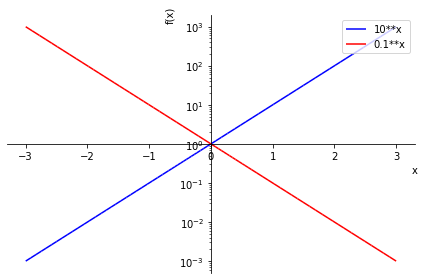

この図の意味を解説せよ．

というのが第一目標です．でも，じっと眺めているだけでは何もわかりません．
ネットにも答えはありません（多分）．
そこで，いろいろ段階を踏んでこのplotを組み上げていきます．

指数と対数がなぜできたのかを思いだすために，
$$ \frac{1500 \times 230}{4} $$
を考えましょう．そのまま計算させるだけでなく，対数とってevalfで打ち出して手計算して，それを戻してください．

In [24]:
print(1500 * 230 /4);

86250.0


In [25]:
from sympy import *

print(log(1500).evalf());
print(log(230).evalf());
print(log(4).evalf());

7.31322038709030
5.43807930892320
1.38629436111989


In [26]:
val = 7.31+5.44-1.386;
print(val);

11.364


In [27]:
print(exp(val).evalf());

86163.3334371859


## $2^x$のplot
指数関数を思い出してもらうために，まずはベタ打ちです．

$2^x$を(x,-3,3)でplotせよ．
sympyのplotを使ってください．



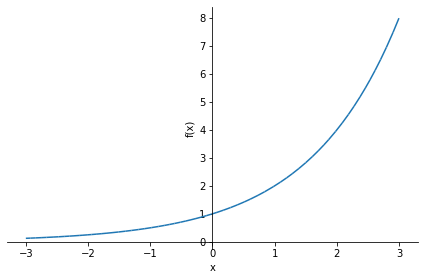

In [28]:
%matplotlib inline

from sympy import *
x = Symbol('x')
plot(2**x,(x,-3,3))

普通に$2, 2^2, 2^3, 2^4$と確認できますが，$1/2, 1/2^2, 1/2^3$なんかも数値で確認できるでしょう．

## $2^x$と$1/2^x$の同時plot
2つの関数を同時にplotする練習を兼ねて，
$2^x$と$1/2^x$を(x,-3,3)で同時にplotせよ．

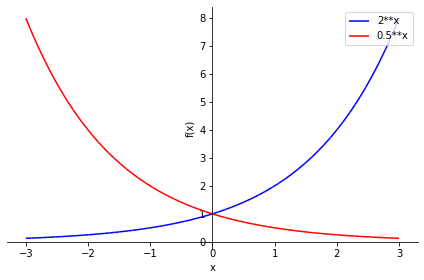

In [29]:
p = plot(2**x, (1/2)**x, (x, -3,3), 
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

`2**x`と`0.5**x`がどういう変化をするかがわかるでしょう．

* `2**x`は，xの増加に従って，単調に増加していきます．
* `2**x`は，xの減少に伴って，単調に減少しますが，これは，`1/2**x`でxを増加していくのと等価です．

こうしてx=0に対して対称になっていることが確認できます．

## 変数への変換
変数にパラメータを入れることで，変更箇所を出来るだけまとめて一般化しましょう．
2とか3として直打ちしている数値を変数に変更しましょう．

``` python
a = 2
n = 3
```

として再度同時plotせよ．


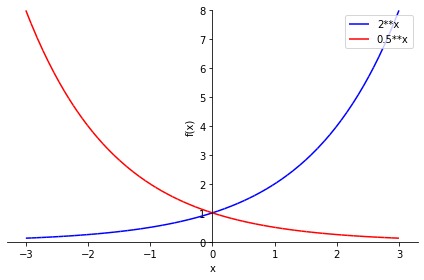

In [30]:
a = 2
n = 3
p = plot(a**x, (1/a)**x, (x, -n, n), ylim=[0,a**n],
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

ここでは出力は変わりません．

## $10^x$と$1/10^x$の同時plot
先ほど調整した`a,n`を変更するだけで，出力結果が変わることを確認してください．

$10^x$と$1/10^x$を(x,-3,3)で同時にplotせよ．


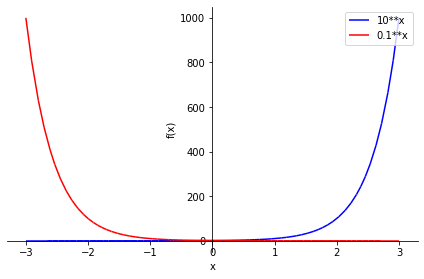

In [31]:
a = 10
n = 3
p = plot(a**x, (1/a)**x, (x, -n, n), 
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

グラフの概形が変わっているのに気が付きますか？　指数の底を2から10に変更することで，
変化がより顕著な関数になっていることが確認できます．
こうなると，小さな値の変化も微妙だし，大きな値の変化もわかりづらくなります．

# 指数関数の和の公式

## $a^r a^q = a^{r+q}$

a=10, r=3, q=-1.5 で　$a^r a^q = a^{r+q}$を確認せよ．

In [32]:
a**3*a**(-1.5), a**(3-1.5), a**3*(1/a)**1.5

(31.622776601683793, 31.622776601683793, 31.6227766016838)

## 指数関数の解

グラフから数値を読み取り，$10^x=150$となる$x$の値を小数点以下2桁で求めよ

In [33]:
a**2*a**0.1*a**0.07*a**0.006

149.96848355023738

解を求める関数を使えばすぐですが，グラフを拡大するなどして確認することができます．
先ほどの和の公式を使えば，指数関数は単調増加関数なので，正ならどんな実数も表現できることがわかるでしょう．

# 対数プロット

## logplot

```python
p = plot(a**x, (1/a)**x, (x, -n, n),
         legend=True, show=False)
```
としたとして，
``` python
p.yscale = 'log' 
```
を加えて対数プロットを作成せよ．
対数プロットの意味がわからない場合は，matplotlib, yscale, logでGoogleってください．


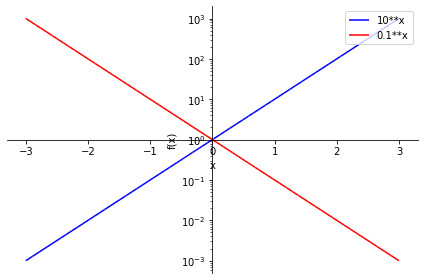

In [34]:
p = plot(a**x, (1/a)**x, (x, -n, n),
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.yscale = 'log'         
p.show()

##  手動logplot

$\log(a^x,a), \log((1/a)^x,a)$をyscale='linear'でplotせよ．
先ほどのlogplotとの違いを指摘せよ．

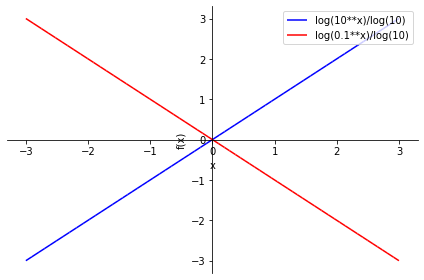

In [35]:
p = plot(log(a**x,a), log((1/a)**x,a), (x, -n, n),
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.yscale = ''         
p.show()

$\log_{10} 10^x = x \log_{10} 10 = x$と変形できますよね．
だから直線になります．

さて，以上の変形，誘導をまとめて，先ほどのlogplot図の意図を解説してください．

# 対数の公式
## $\log xy = \log x + \log y$

$\log xy = \log x + \log y$を　$x=10^2, y = 10^{4}$で確認せよ．

In [36]:
log(a**2,a)+log(a**4,a), log(a**2*a**4,a)

(6, 6)

## $\log_{10}(10^x10^y)$のplot3d

$\log_{10}(10^x10^y)$を　(x,-n,n),(y,-n,n)でplotせよ．

plot3dはテキストで紹介しているが，例はこんな感じ．
``` python
%matplotlib inline
from sympy import *
from sympy.plotting import plot3d
x,y = symbols('x,y')

plot3d(sin(x)*cos(y), (x,-3, 3),(y,-3, 3))
```

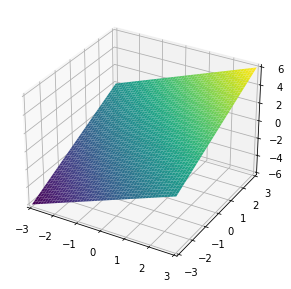

In [37]:
%matplotlib inline
from sympy import *
from sympy.plotting import plot3d
x,y = symbols('x,y')

plot3d(log(a**x*a**y,a), (x,-n,n),(y,-n,n))

## $\log_{10} 10^x + \log _{10} 10^y$のplot3d

$\log_{10} 10^x + \log _{10} 10^y$を　(x,-n,n),(y,-n,n)でplotせよ．

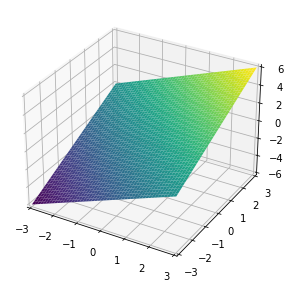

In [38]:
plot3d(log(a**x,a)+log(a**y,a), (x,-n,n),(y,-n,n))

これらの公式から，対数を取ることによって，積の計算が和の計算に変換されることが確認できるでしょう．
コンピュータが苦手とする大きな数と小さな数の掛け算が，たし算に変換できます．
AIの中身である確率計算にとっても便利です．
なぜなら確率は必ず正の値をとり，さらに指数計算が頻出するからです．

# おまけ(交差エントロピー誤差)

対数を取るのは確率を考えるときに便利と述べました．
実際にロジスティック回帰と呼ばれる手法では，確率の対数をとって，
交差エントロピー誤差を考えます(p.215-9あたり).

その様子を示したのが下のプロットです．
$$f(x) = (1-x)^3x$$
に対して$-\log(f(x))$をとり，その様子をplotしています．

* 大きな数での変化が緩やかになっていること，
* 小さな数での変化が大きくなっていること，
* 最大位置(最小位置)が変わらないこと

に注意ください．
なお，定義域は$0<x<1$ですが，
pythonは，最初は文句を言いますが，適当に判断して表示してくれます．

それと，安定位置を求めるための微分や方程式の解を求めるcommandをつけておきます．
来週詳しく扱います．

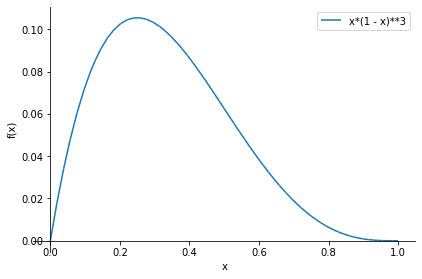

In [39]:
%matplotlib inline

from sympy import *
x = Symbol('x')

p = plot((1-x)**3*x, (x, 0, 1),
         legend=True, show=False)
p.show()

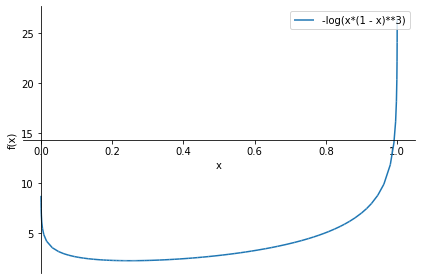

In [40]:
p = plot(-log((1-x)**3*x), (x, 0.0, 1.0),
         legend=True, show=False)
p.show()

In [41]:
diff(-log((1-x)**3*x),x)

-(-3*x*(1 - x)**2 + (1 - x)**3)/(x*(1 - x)**3)

In [42]:
simplify(diff(-log((1-x)**3*x),x))

(1 - 4*x)/(x*(x - 1))

In [43]:
solve(diff(-log((1-x)**3*x),x))

[1/4]